<h2>Load and Prepare Data</h2>

We're also going to visualize the data just to see what's going on and how everything correlates with our y values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./coffee_shop_revenue_original.csv")

y = data["Daily_Revenue"]

X = data.drop("Daily_Revenue", axis=1)

# Combine features and target into one DataFrame for easy filtering
data = pd.concat([X, y], axis=1)

# Drop rows where the target variable is NaN
cleaned_data = data.dropna()

# Split the data back into features (X) and target (y)
X = cleaned_data.iloc[:, :-1]
y = cleaned_data.iloc[:, -1]

# Display the number of rows removed
rows_removed = len(data) - len(cleaned_data)

In [2]:
# sns.pairplot(data, kind='scatter', plot_kws={'alpha': 0.4})

# sns.lmplot(x="Average_Order_Value", y="Daily_Revenue", data = data, scatter_kws={'alpha': 0.1})

<h2>Splitting data into training and test sets</h2>

In [3]:
from sklearn.model_selection import train_test_split

# Do a 70/30 split (e.g., 70% train, 30% other)
X_train, X_leftover, y_train, y_leftover = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,    # for reproducibility
    shuffle=True,       # whether to shuffle the data before splitting
)

# Split the remaining 30% into validation/testing (15%/15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_leftover, y_leftover,
    test_size=0.5,
    random_state=42,
    shuffle=True,
)

# Compute statistics for X (features)
X_mean = X_train.mean(axis=0)  # Mean of each feature
X_std = X_train.std(axis=0)    # Standard deviation of each feature

# Standardize X
X_train = (X_train - X_mean) / X_std
X_val = (X_val - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# Compute statistics for y (targets)
y_mean = y_train.mean()  # Mean of target
y_std = y_train.std()    # Standard deviation of target

# Standardize y
y_train = (y_train - y_mean) / y_std
y_val = (y_val - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

<h2>Train model</h2>

In [4]:
from main import *
model = LinearRegressionModel(6, 1, 4)

epoch_count, loss_values, test_loss_values = model.fit(model, 
                                                       torch.tensor(X_train.values, dtype=torch.float), 
                                                       torch.tensor(y_train.values, dtype=torch.float), 
                                                       125, 
                                                       torch.tensor(X_val.values, dtype=torch.float), 
                                                       torch.tensor(y_val.values, dtype=torch.float))

Epoch: 0 | Training loss: 0.7985436916351318 | Validation loss: 0.6925200819969177
Epoch: 25 | Training loss: 0.2621588408946991 | Validation loss: 0.2422499656677246
Epoch: 50 | Training loss: 0.07864754647016525 | Validation loss: 0.07589533925056458
Epoch: 75 | Training loss: 0.05901673063635826 | Validation loss: 0.058505330234766006
Epoch: 100 | Training loss: 0.05706306919455528 | Validation loss: 0.05741886794567108


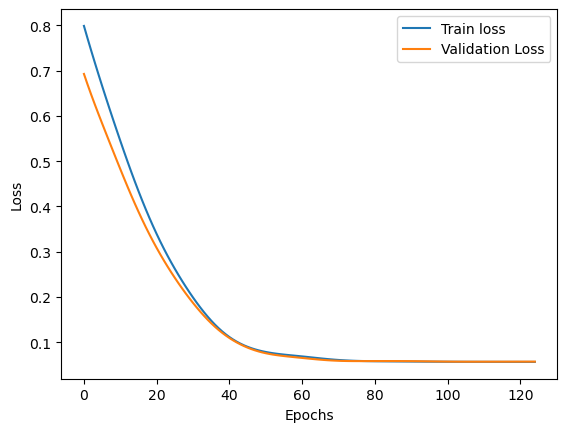

In [5]:
plot_loss(epoch_count, loss_values, test_loss_values, "Validation Loss")

<h2>Save model</h2>

In [6]:
# # Saving our PyTorch model
# from pathlib import Path

# # 1. Create model's directory
# MODEL_PATH = Path("models")
# MODEL_PATH.mkdir(parents=True, exist_ok=True)

# # 2. Create model save path
# MODEL_NAME = "coffee_prediction_model.pth"
# MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# # 3. Save the model state dict
# torch.save(obj=model.state_dict(),f=MODEL_SAVE_PATH)

<h2>Evaluate the Model</h2>

In [7]:
loss_val = evaluate(model, torch.tensor(X_test.values, dtype=torch.float), torch.tensor(y_test.values, dtype=torch.float))
print(f"Loss value for testing data: {loss_val}")

Loss value for testing data: 0.054121825844049454


<h2>Code to generate the dollar amount</h2>

In [8]:
# I need to print out a column of the test printed out in a table compared to the true y values
X_test_ten = X_test.head(10)
X_test_ten = X_test_ten.values.tolist()
y_results = []

y_test_ten = y_test.head(10)
y_test_ten = y_test_ten.values.tolist()
y_true = []

for x_test in X_test_ten:
    y_results.append(generate(model, torch.tensor(x_test, dtype=torch.float), X_mean, X_std, y_mean, y_std, True))

for y_tes in y_test_ten:
    y_true.append(round(y_tes * y_std + y_mean, 2))


print(y_results)
print(y_true)

[1754.79, 2949.06, 1982.82, 1559.99, 1049.02, 1377.64, 855.54, 1868.32, 2497.62, 3079.84]
[2133.75, 2606.22, 1534.74, 1572.76, 947.08, 1252.04, 571.57, 1712.21, 2695.46, 3032.74]
